In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

In [ ]:
# initializing parameters
Lx = 1.5 * 10**(-3) # H
Cx = 0.22 * 10**(-6) # F
R1 = 100 # Ohm
R2 = 1000 # Ohm
Ugen = 0.8 # V

In [ ]:
task3 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/E12%20-%20Task%203.csv', delimiter = ',', decimal = '.' )
task3

,Frequency (Hz),U0 (V),UR (V),Resistance (Ohm)
0,10,122.6,4.822,100.0
1,14,123.6,4.822,NaN
2,20,123.6,4.822,NaN
3,26,123.6,4.822,NaN
4,36,123.6,5.263,NaN
5,49,122.6,4.381,NaN
6,67,122.6,4.381,NaN
7,92,122.6,3.940,NaN
8,127,122.6,4.381,NaN
9,174,113.8,4.381,NaN


In [ ]:
task3_U0 = np.array(task3['U0 (V)'])*10**(-3)
task3_UR = np.array(task3['UR (V)'])*10**(-3)
task3_freq = np.array(task3['Frequency (Hz)'])

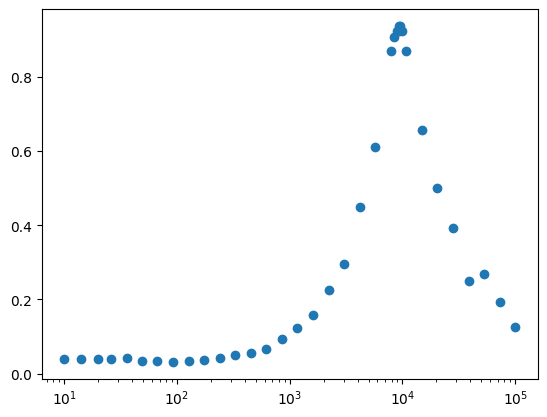

In [ ]:
plt.scatter(task3_freq,task3_UR/task3_U0)

plt.xscale('log')

In [ ]:
def fit(f,C, L, RSP,R):
  return R/np.sqrt((RSP**2*(1+(2*np.pi*f*R*C)**2)+R**2*(1-(2*np.pi*f)**2*R*C)**2+(2*np.pi*f*L)**2+2*RSP*R)/((2*np.pi*f*R*C)**2+(1-(2*np.pi*f)**2*R*C)**2))

In [ ]:
def ft(omega, C, L, R_sp, R):
  return R/np.sqrt((omega**2*(C*L**2*omega**2 + C*R_sp**2 - L)**2 + (R*(C**2*L**2*omega**4 + C**2*R_sp**2*omega**2 - 2*C*L*omega**2 + 1) + R_sp)**2)/(C**2*L**2*omega**4 + C**2*R_sp**2*omega**2 - 2*C*L*omega**2 + 1)**2)

In [ ]:
popt, pcov = curve_fit(fit,task3_freq,task3_UR/task3_U0, p0 = [ 0.22 * 10**(-6),1.5 * 10**(-3),22, 100])
popt

array([1.13372404e-08, 1.88114784e-02, 1.71199404e+02, 6.40782875e+00])

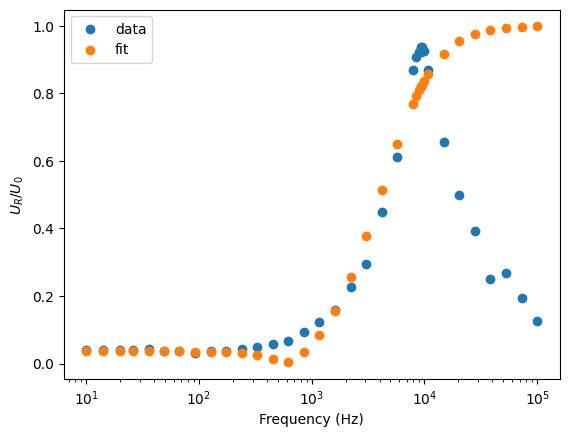

In [ ]:
plt.scatter(task3_freq,task3_UR/task3_U0, label = 'data')
plt.scatter(task3_freq,fit(task3_freq, popt[0],popt[1],popt[2],popt[3]), label = 'fit')
plt.xscale('log')
plt.ylabel('$U_R/U_0$')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.savefig('fit2.png', dpi = 500)